# Group 8

Each of us chose one metric to analyze. We decided the metrics were:

    A)Crime Rates
    B)Playground Quantity and Quality
    C)Median age of death. 
  
A pretty diverse set of data, I know. We all chose the data that we did because we believed those to be very important factors for deciding whether a place is a good place to live. So the first metric that we chose, the median age of death in each neighborhood. We chose this because

## Median Death Age:

In [4]:
import pandas as pd

ages = pd.read_csv("mediaDeathAge.csv", parse_dates = True)
ages.head(10)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
5,WEST END,5.0,76.7,9.0,78.0,14.0,77.5
6,ESPLEN,3.0,NaN,13.0,72.5,16.0,71.7
7,ARLINGTON HEIGHTS,10.0,55.0,7.0,72.5,17.0,63.7
8,STRIP DISTRICT,7.0,76.7,12.0,70.0,19.0,72.5
9,FAIRYWOOD,11.0,62.5,9.0,42.5,21.0,53.3


I really onlly care about which neighborhood has the highest median age at death. I'll first sort through the average age at death data like this:

In [5]:
ages = ages[['NEIGHBORHOOD','TOTAL MD AGE AT DEATH']]
ages.head(10)

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


So now I have cleared the data for highest age at death. Since some of this data is not yet sorted and contains null values, the next thing I want to do is sort in descending order.

In [6]:
ages.sort_values(by=['TOTAL MD AGE AT DEATH'], inplace = True, ascending = False)
print(ages.head())

           NEIGHBORHOOD  TOTAL MD AGE AT DEATH
89  SQUIRREL HILL SOUTH                   85.9
76        NORTH OAKLAND                   85.6
71           BANKSVILLE                   85.5
53         POINT BREEZE                   85.1
68  SQUIRREL HILL NORTH                   85.0


### Representing the data in a bar chart ##

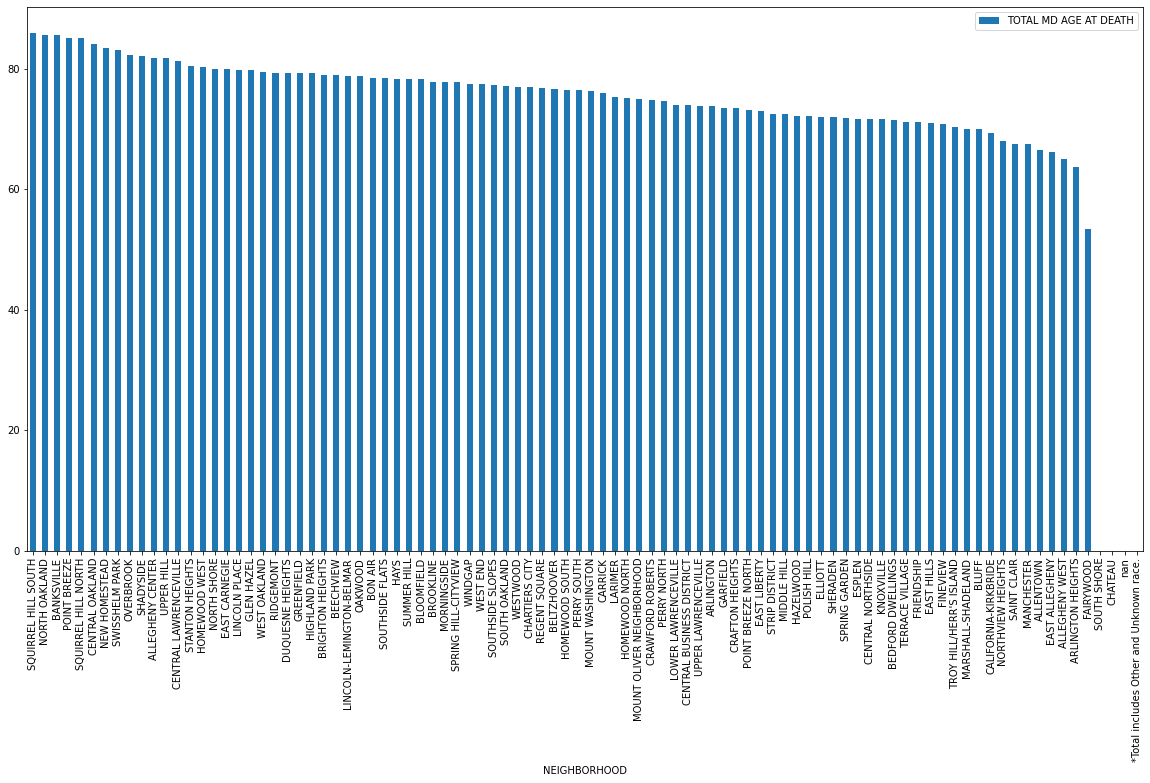

In [7]:
#sorting the data in descending order and graphing it
dataFrame = ages.sort_values('TOTAL MD AGE AT DEATH', ascending = False).plot.bar(x = 'NEIGHBORHOOD', y = 'TOTAL MD AGE AT DEATH', figsize = (20,10))

### Conclusion

In conclusion, the three best neighborhoods that I found were Squirrel Hill South, North Oakland, and Banksville. This is because those three have the highest median age at death. Squirrel Hill South being the best neighborhood because of its high median death age of 85.9

## Safety :
The next data set that we chose was the crime data of each neighborhood. It is pretty generic but living in a neighborhood with high crime rates can be dangerous and would make living there a liability and we believe that would detract from the overall quality of the neighborhood.

### Designing the Metric
We believe safety is an important part of deciding the best neighborhood in Pittsburgh. If the neighborhood is safe, it will be more appealing to people looking to move there. Residents will also participate in more neighborhood events and visit commercial districts more. 

To create a safety metric, we will first read in a dataset for arrests in Pittsburgh Neighborhoods, using the head() function to get a look at what we are working with.

In [8]:
crime = pd.read_csv("CrimeData.csv", parse_dates = True)
crime.groupby("INCIDENTNEIGHBORHOOD")
crime.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


The "offenses" column gives a small summary of the crime that occured. We can use this to make our safety metric more accurate, assigning more weight to violent crime than petty crime. 

### Working with the Data
Firstly, we'll cut out all the unnecessary data columns, keeping the "offenses" and "incident_neighborhood" columns. We will also keep the CCR column so we can check for duplicates later.

In [9]:
crime = crime[['CCR', 'OFFENSES', 'INCIDENTNEIGHBORHOOD']]
crime.head(10)

,CCR,OFFENSES,INCIDENTNEIGHBORHOOD
0,16158872,3929 Retail Theft.,Bloomfield
1,16144120,13(a)(16) Possession of Controlled Substance,Outside City
2,16144165,3929 Retail Theft.,Westwood
3,16145257,5503 Disorderly Conduct. / 5505 Public Drunken...,East Allegheny
4,16145962,2702 Aggravated Assault. / 2705 Recklessy Enda...,Crafton Heights
5,16144301,3929 Retail Theft.,Greenfield
6,16147655,2701 Simple Assault.,Brookline
7,16146037,2701 Simple Assault. / 5505 Public Drunkenness...,Regent Square
8,16132537,903 Criminal Conspiracy. / 3701 Robbery.,East Liberty
9,16138646,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,NaN


Much better. Now we can split the data into two categories: violent and non-violent. We will do so by going through the dataset and eyeing all the keywords used to describe violent crime. Then we can create the non-violent dataset by exclusion. 

First, the violent crime.

In [10]:
violent_crime = crime[crime['OFFENSES'].str.contains('|'.join(["Assault", "Homicide", "Robbery", "IDSI", "Death", "Injury"]), na=False)]
violent_crime.head(10)

,CCR,OFFENSES,INCIDENTNEIGHBORHOOD
4,16145962,2702 Aggravated Assault. / 2705 Recklessy Enda...,Crafton Heights
6,16147655,2701 Simple Assault.,Brookline
7,16146037,2701 Simple Assault. / 5505 Public Drunkenness...,Regent Square
8,16132537,903 Criminal Conspiracy. / 3701 Robbery.,East Liberty
9,16138646,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,NaN
10,16149661,2701 Simple Assault. / 3304 Criminal Mischief....,East Hills
11,16146903,2701 Simple Assault.,Carrick
15,16156591,903 Criminal Conspiracy. / 3701 Robbery.,Allegheny Center
20,16150804,2701 Simple Assault.,South Side Flats
21,16157283,903 Criminal Conspiracy. / 2701 Simple Assault...,East Carnegie


Then, the non violent crime.

In [11]:
non_violent_crime = crime[~crime['CCR'].isin(violent_crime['CCR'])]
non_violent_crime.head(10)

,CCR,OFFENSES,INCIDENTNEIGHBORHOOD
0,16158872,3929 Retail Theft.,Bloomfield
1,16144120,13(a)(16) Possession of Controlled Substance,Outside City
2,16144165,3929 Retail Theft.,Westwood
3,16145257,5503 Disorderly Conduct. / 5505 Public Drunken...,East Allegheny
5,16144301,3929 Retail Theft.,Greenfield
12,16153543,5507 Obstructing Highways and Passages.,East Allegheny
13,16144432,3921(a) Theft by Unlawful Taking or Dispositio...,Crafton Heights
14,16157821,5123 Contraband. / 13(a)(16) Possession of Con...,East Allegheny
16,16160913,5505 Public Drunkenness / 13(a)(32) Parapherna...,East Allegheny
17,16160953,6106 Firearms not to be Carried without a Lice...,South Side Flats


### Getting Scores

Now that we've categorized the data, we can get a count for the neighborhoods.

In [12]:
violent_crime = violent_crime['INCIDENTNEIGHBORHOOD'].value_counts(dropna=True).rename_axis('INCIDENTNEIGHBORHOOD').reset_index(name='count')

violent_crime.head(10)

,INCIDENTNEIGHBORHOOD,count
0,South Side Flats,599
1,Central Business District,590
2,Carrick,567
3,Marshall-Shadeland,437
4,Homewood North,400
5,Sheraden,375
6,Beechview,370
7,East Hills,353
8,Brookline,352
9,Mount Washington,349


In [13]:
non_violent_crime = non_violent_crime['INCIDENTNEIGHBORHOOD'].value_counts(dropna=True).rename_axis('INCIDENTNEIGHBORHOOD').reset_index(name='count')

non_violent_crime.head(10)

,INCIDENTNEIGHBORHOOD,count
0,Central Business District,2233
1,South Side Flats,1758
2,East Allegheny,1379
3,Homewood South,1181
4,Carrick,1089
5,Homewood North,974
6,East Liberty,965
7,Bluff,887
8,Allegheny Center,717
9,Mount Washington,663


Now, we can get a weighted score by combining the counts with a 2x multiplier for violent crime.

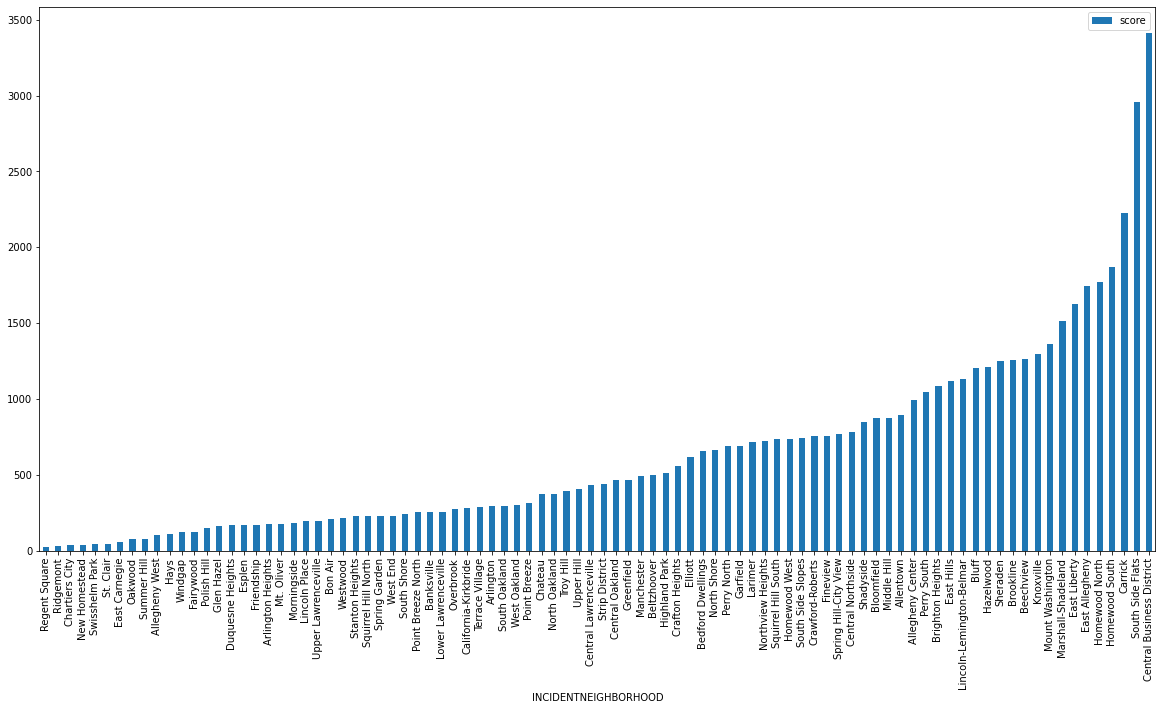

In [14]:
violent_crime_dict = pd.Series(violent_crime['count'].values,index=violent_crime['INCIDENTNEIGHBORHOOD']).to_dict()
crime_score = non_violent_crime


for index, row in crime_score.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] in violent_crime_dict:
        crime_score.at[index, 'count'] += violent_crime_dict[row['INCIDENTNEIGHBORHOOD']] * 2

crime_score = pd.DataFrame.from_dict(crime_score)
crime_score.columns = ['INCIDENTNEIGHBORHOOD', 'score']

# make sure population and crime score neighborhoods match
crime_score = crime_score[~crime_score['INCIDENTNEIGHBORHOOD'].str.contains('|'.join(["Golden Triangle/Civic Arena", "Outside", "Troy Hill-Herrs Island"]), na=False)]


crime_score = crime_score.sort_values('score', ascending = 'True')
crime_score.plot.bar('INCIDENTNEIGHBORHOOD', 'score', figsize=(20,10))

### Accounting for population
Neighborhoods with greater populations will naturally have a higher number of arrests, so we should divide each count by population. In other words, we will create a final metric of "crime score per capita".

In [16]:
population = pd.read_csv("population.csv", parse_dates = True)
population = population[['Neighborhood', 'Population (2010)']]
population.head(10)

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244
5,Banksville,4144
6,Bedford Dwellings,1202
7,Beechview,7974
8,Beltzhoover,1925
9,Bloomfield,8442


In [17]:
population_dict = pd.Series(population['Population (2010)'].values,index=population['Neighborhood']).to_dict()
crime_score['score'] = crime_score['score'].astype(float)

for index, row in crime_score.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] in population_dict:
        crime_score.at[index, 'score'] /= population_dict[row['INCIDENTNEIGHBORHOOD']]
        
crime_score = crime_score.sort_values('score', ascending = 'True')    
crime_score.head(10)

,INCIDENTNEIGHBORHOOD,score
53,Squirrel Hill North,0.020153
91,Regent Square,0.026940
93,Swisshelm Park,0.031594
43,North Oakland,0.035636
92,New Homestead,0.039394
29,Squirrel Hill South,0.048643
67,Stanton Heights,0.049772
68,Morningside,0.055290
54,Point Breeze,0.059454
72,Lincoln Place,0.060118


### Conclusion:

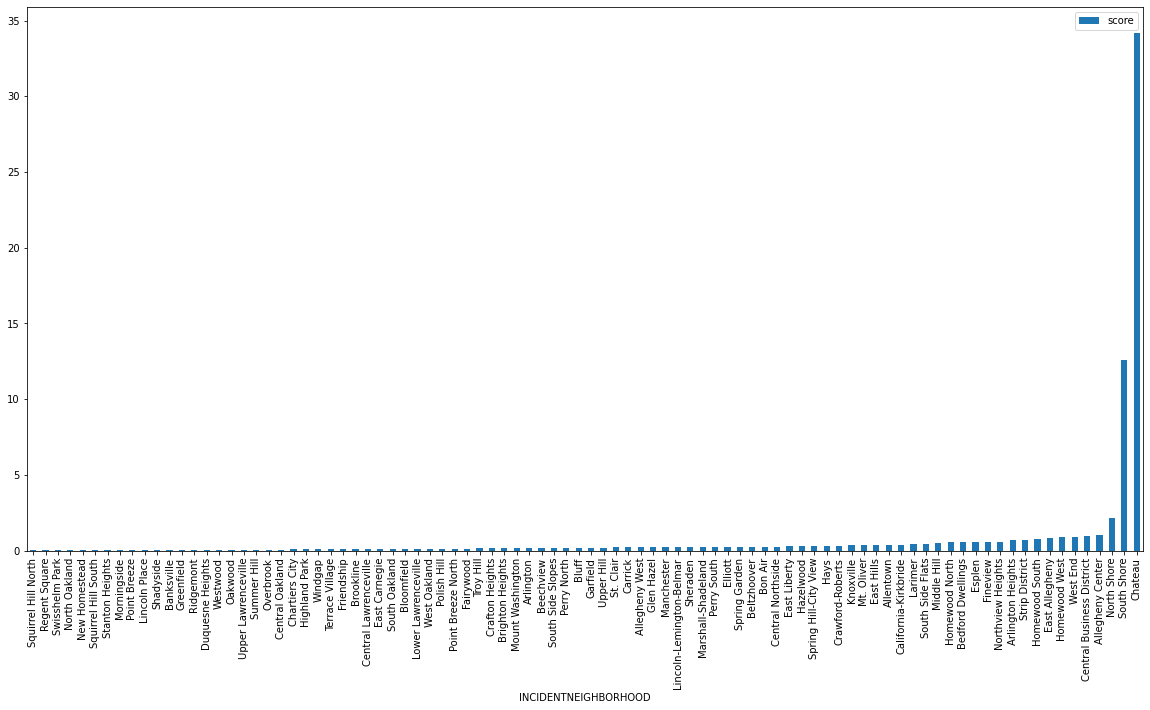

In [18]:
crime_score.plot.bar('INCIDENTNEIGHBORHOOD', 'score', figsize=(20,10))

Looks like Squirrel Hill North is the best scoring neighborhood for this metric, followed by Regent Square and Swisshelm Park.

## Child Friendliness:

finally the last data set that we used was the child frendliness of the neighborhood. we chose playgrounds because ‘why not?’ A fun neighborhood is an excellent neighborhood. And further reflecting on it, everyone grows out of the times that you can play in playgrounds but having those experiences as a child is invaluable. Everyone has had the experience of scraping their knees at a playground. Everyone has had the experience of spinning on the swings, and maybe if they were brave enough, jumping off. So, having good playgrounds that are inclusive means a lot.

### The Metric!

I decided to take into account the amount of playground equipment and whether it is ADA Accessible. First, in order to do so, we must first look at the data.

In [21]:
playground = pd.read_csv("playground-data.csv",parse_dates = True)
playground.groupby("name")
'''
This was code added after I finished my analysis
print(playground['neighborhood'].value_counts())
dots = playground[['longitude','latitude']]
'''


playground = playground[["name","neighborhood","ada_accessible"]]
playground.head()

,name,neighborhood,ada_accessible
0,Able Long Playground,Beechview,f
1,North Ave. Playground,Allegheny Center,f
2,Vietnam Veteran's Playground,Squirrel Hill South,f
3,Schenley Overlook Playground,Squirrel Hill South,t
4,Schenley Overlook Playground,Squirrel Hill South,f


## Let's Look a bit deeper

What we have is all of the playground equipment that is spread out around the pittsburgh neighborhoods grouped by the playgrounds that they are in. Now let's look at all of the equipment that that is ADA accessible.

In [22]:
ADA = playground[playground["ada_accessible"].str.contains("t", na = False)]

ADA.head(20)

,name,neighborhood,ada_accessible
3,Schenley Overlook Playground,Squirrel Hill South,t
6,Chartiers Playground,Windgap,t
10,Cross and Strauss Playground,Perry South,t
15,Dunbar Playground,Crafton Heights,t
18,Fineview Playground,Fineview,t
22,Kennard Playground,Terrace Village,t
27,Lewis Playground,Hazelwood,t
38,McGonigle Playground,Sheraden,t
50,Oakwood Playground,Oakwood,t
54,Roland Lockridge Playground,New Homestead,t


### What's next?

When considering the data, I am going to give one point for any piece of equipment that exists. I will also award another point if that piece of equipment is also ADA accessible.

In [23]:
baseScore = playground["neighborhood"].value_counts(dropna = True).rename_axis("Neighborhood").reset_index(name = "Score")

baseScore.head(20)

,Neighborhood,Score
0,Squirrel Hill South,32
1,East Liberty,26
2,Beechview,21
3,Allegheny Center,15
4,South Side Slopes,14
5,Sheraden,13
6,Hazelwood,13
7,Elliott,11
8,Highland Park,10
9,Squirrel Hill North,10


In [24]:
addedBonus = ADA["neighborhood"].value_counts(dropna = True).rename_axis("Neighborhood").reset_index(name = "Score")

addedBonus.head(20)

,Neighborhood,Score
0,Squirrel Hill South,7
1,South Side Slopes,4
2,East Liberty,4
3,Beechview,4
4,Elliott,4
5,Highland Park,3
6,Sheraden,3
7,Mount Washington,3
8,Hazelwood,2
9,Greenfield,2


### Combining the data

Now we, will add up the data all together

In [26]:
newScore = baseScore

index1 = 0
for i in newScore.iloc[:,0]:
    index2 = 0
    for j in addedBonus.iloc[:,0]:
        if i ==j:
            newScore.iloc[index1,1] += addedBonus.iloc[index2,1]
        index2 += 1
    
    index1 += 1

newScore.head(10)

,Neighborhood,Score
0,Squirrel Hill South,39
1,East Liberty,30
2,Beechview,25
3,Allegheny Center,16
4,South Side Slopes,18
5,Sheraden,16
6,Hazelwood,15
7,Elliott,15
8,Highland Park,13
9,Squirrel Hill North,11


### And Finally

Now that we have the full score of the each neighborhood, it is time to make some GRAPHS!!!

First we'll look at the data of all of the compiled data then we will look at that without the ADA acessibility bonus.

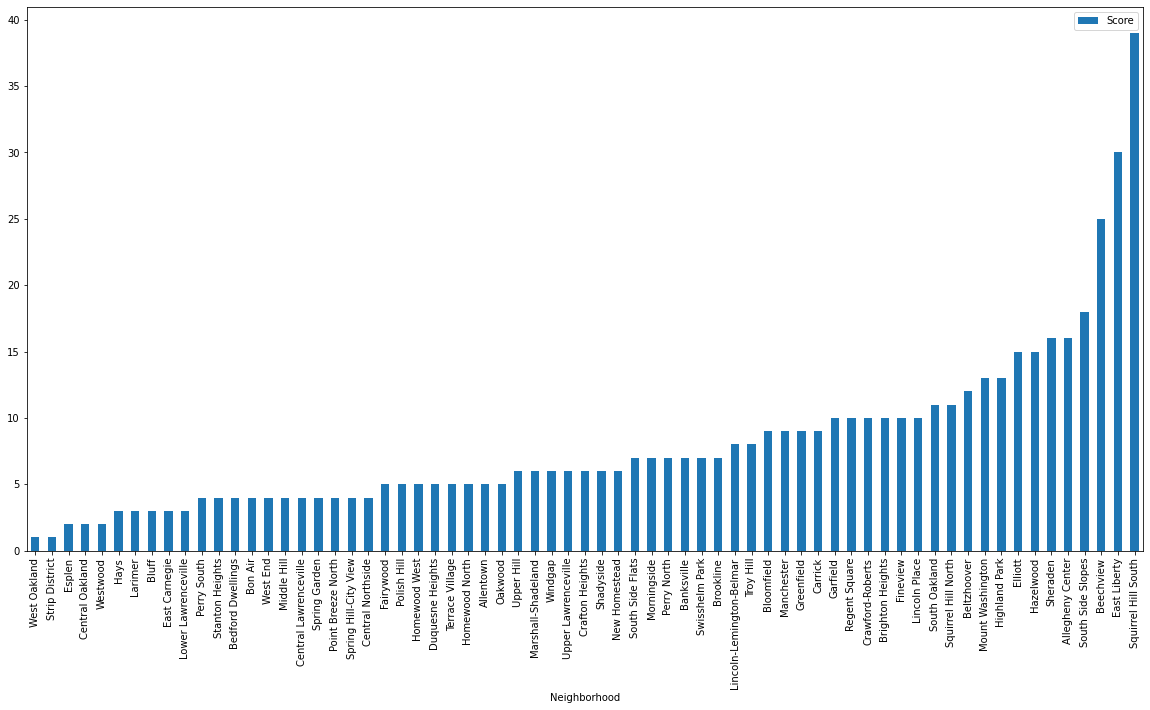

In [27]:
newScore = newScore.sort_values('Score',ascending = True).plot.bar("Neighborhood", "Score", figsize = (20,10))

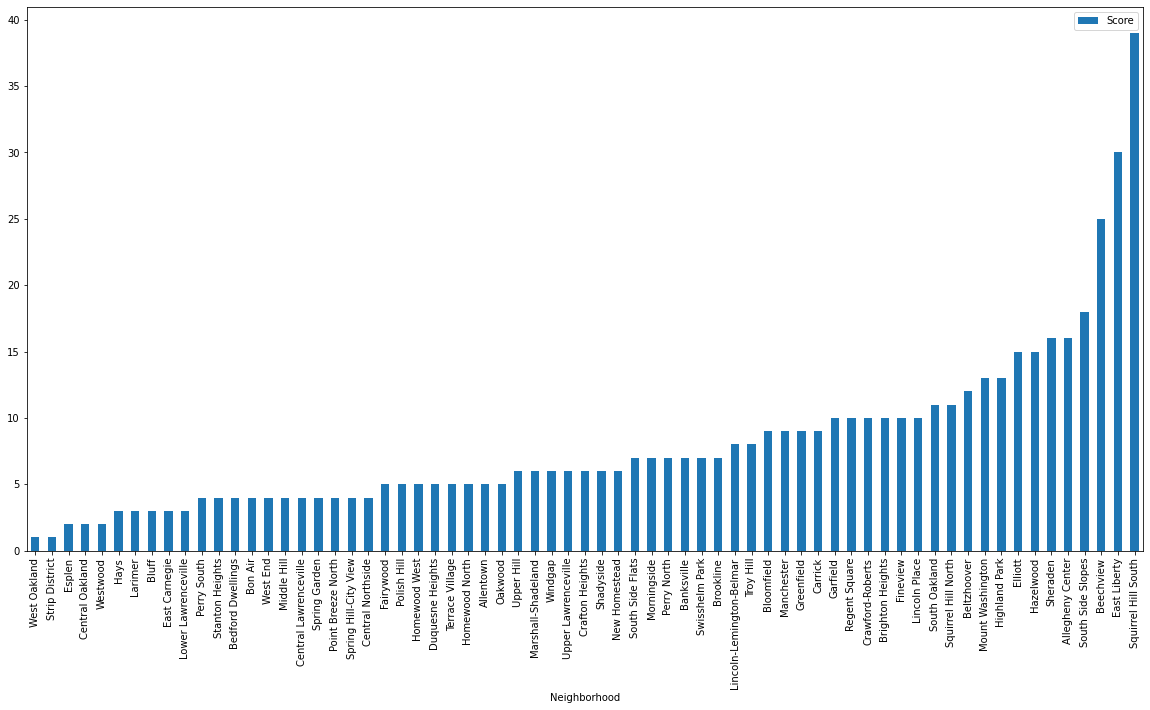

In [28]:
baseScore.sort_values("Score",ascending = True).plot.bar("Neighborhood","Score", figsize = (20,10))

## Conclusion
In both situations, if we look at the total amount of playbround equipment or take a wholistic approach and consider the ADA acessible items, Squirrel Hill South wins in both categories! The top three are also the same in both categories, with East Liberty and Beechview in that order. I know that this is not the best metric for deciding where you should live, when you should more heavily weigh crime and education quality, but playgrounds are just the fun. A place without playgrounds is a place that is not very hospitable for children, so I believe that this metric is still very important!

## Combining the Data

Finally, our winner is Squirrel Hill South. It showed up as the best neighborhood in both the median death age and the playgrounds analyses and was not too far off from being number one in the crime rate analysis. So overall (insert winner here) is the best neighborhood in Pittsburgh.
